In [1]:
import numpy as np,pylab as pl
import os,zipfile,cv2

In [2]:
def get_files(dir_name):
    file_list=sorted(os.listdir(dir_name))
    input_files=[f for f in file_list 
                 if f[-4:]=='.jpg']
    print(str(len(input_files))+\
          ' files with many objects:\n')
    print(input_files)
    return input_files
dir_name='../input/object-detection/'
input_files=get_files(dir_name)

1 files with many objects:

['IMG_20201019_214357.jpg']


In [3]:
def get_edges(file):
    img=cv2.imread(file)   
    gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    edges=cv2.Canny(gray_img,10,100) 
    cv2.waitKey(0)
    return img,gray_img,edges
img_list,gray_img_list,edges_list=[],[],[]
for i in range(len(input_files)):
    img,gray_img,edges=\
    get_edges(dir_name+input_files[i])
    img_list+=[img]
    gray_img_list+=[gray_img]
    edges_list+=[edges]
len(img_list)

1

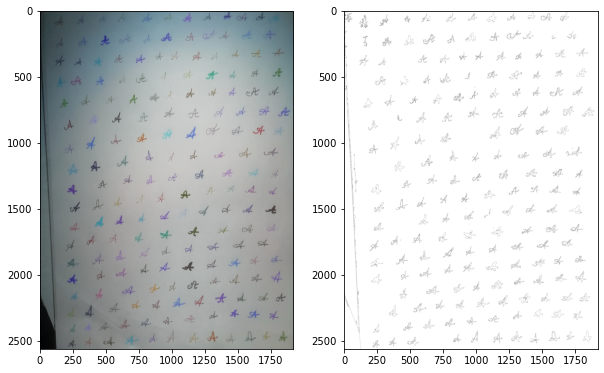

In [4]:
def display2images(img1,img2):
    fig=pl.figure(figsize=(10,10))
    ax=fig.add_subplot(1,2,1)
    pl.imshow(img1,cmap='Greys') 
    ax=fig.add_subplot(1,2,2)
    pl.imshow(img2,cmap='Greys')
    pl.show()
display2images(img_list[0],edges_list[0])

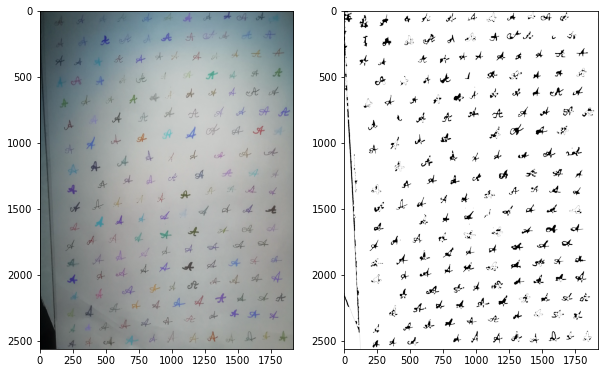

In [5]:
def get_closed(edges):
    kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(7,7)) 
    closed=cv2.morphologyEx(edges,cv2.MORPH_CLOSE,kernel) 
    cv2.waitKey(0)
    return closed
closed_list=[]
for i in range(len(input_files)):
    closed=get_closed(edges_list[i])
    closed_list+=[closed]
display2images(img_list[0],closed_list[0])

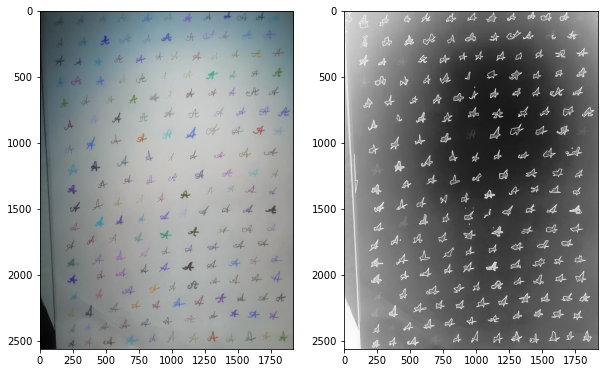

In [6]:
def get_contours(gray_img,closed):
    (contours, _)=cv2.findContours(
        closed.copy(),cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    for c in contours: 
        arc=cv2.arcLength(c,True) 
        approx_pdp=cv2.approxPolyDP(c,.02*arc,True) 
        contours_img=cv2.drawContours(
            gray_img,[approx_pdp],-1,(0,255,0),2) 
    cv2.waitKey(0) 
    return contours,contours_img
contours_list,contours_img_list=[],[]
for i in range(len(input_files)):
    contours,contours_img=\
    get_contours(gray_img_list[i],closed_list[i])
    contours_list+=[contours]
    contours_img_list+=[contours_img]
display2images(img_list[0],contours_img_list[0])

In [7]:
def create_zip(img_list,contours_list,file_name):
    file_name_zip=file_name[:8]+'.zip'
    idx=0
    for i in range(len(img_list)):
        contours=contours_list[i]
        img=img=img_list[i]
        for c in contours: 
            x,y,w,h=cv2.boundingRect(c)
            if w>30 and h>30: 
                new_img=img[y-3:y+h+3,
                            x-3:x+w+3]
                if min(new_img.shape[0],
                       new_img.shape[1])>30:
                    new_img=cv2.resize(new_img,(32,32))
                    cv2.imwrite(file_name%idx+'.png',
                                new_img)
                    if idx==0:
                        with zipfile.ZipFile(file_name_zip,'w') as f:
                            f.write(file_name%idx+'.png')
                    else:
                        with zipfile.ZipFile(file_name_zip,'a') as f:
                            f.write(file_name%idx+'.png')
                    os.remove(file_name%idx+'.png')
                    idx+=1 
    with zipfile.ZipFile(file_name_zip,'r') as f:
        file_list_out=(f.namelist())
        f.close()
    return file_list_out
file_name='01_00_00_%03d'
file_list_out=create_zip(
    img_list,contours_list,file_name)
len(file_list_out)

175